# 資料準備

In [154]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 建立共用函數

In [0]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),
                       name ='W')

In [0]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape)
                       , name = 'b')

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], 
                        padding='SAME')

In [0]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')

# 輸入層 Input Layer

In [0]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float",shape=[None, 784]
                       ,name="x")    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolutional Layer 1

In [0]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )

In [0]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

# Convolutional Layer 2

In [0]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)

In [0]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 

# Fully Connected Layer

In [0]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [0]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(
                  tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, 
                                keep_prob=0.8)

# 輸出層Output

In [0]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(
                 tf.matmul(D_Hidden_Dropout,
                           W4)+b4)

# 設定訓練模型最佳化步驟

In [0]:
with tf.name_scope("optimizer"):
    
    y_label = tf.placeholder("float", shape=[None, 10], 
                              name="y_label")
    
    loss_function = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) \
                    .minimize(loss_function)

# 設定評估模型

In [0]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 訓練模型

In [0]:
trainEpochs = 5
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [170]:
for epoch in range(trainEpochs):

    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         

Train Epoch: 01 Loss= 1.585741758  Accuracy= 0.9026
Train Epoch: 02 Loss= 1.540864944  Accuracy= 0.931
Train Epoch: 03 Loss= 1.519784689  Accuracy= 0.9504
Train Epoch: 04 Loss= 1.507234812  Accuracy= 0.9602
Train Epoch: 05 Loss= 1.504605293  Accuracy= 0.9602
Train Finished takes: 369.5980861186981


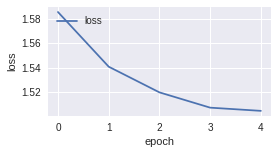

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

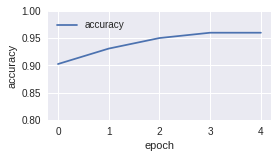

In [172]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


# 評估模型準確率

In [173]:
len(mnist.test.images)

10000

In [174]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images,
                                   y_label: mnist.test.labels}))

Accuracy: 0.962


In [175]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[:5000],
                                   y_label: mnist.test.labels[:5000]}))


Accuracy: 0.9462


In [176]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[5000:],
                                   y_label: mnist.test.labels[5000:]}))

Accuracy: 0.975


# 預測機率

In [177]:
#y_predict=sess.run(y_predict, 
#                  feed_dict={x: mnist.test.images[:5000]})
print(mnist.test.images[0].shape)

(784,)


In [178]:
y_predict[:5]

<tf.Tensor 'strided_slice_1:0' shape=(?, 10) dtype=float32>

# 預測結果

In [0]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images ,
                                      y_label: mnist.test.labels})

In [180]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
import numpy as np
def show_images_labels_predict(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 10):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[i],(28, 28)), 
                  cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[i]))+
                     ",predict="+str(prediction_result[i])
                     ,fontsize=9) 
    plt.show()

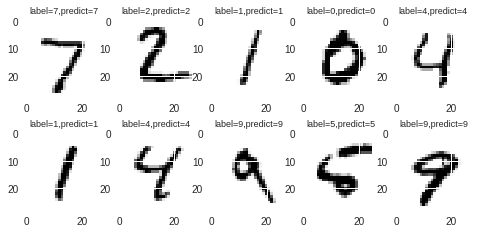

In [182]:
show_images_labels_predict(mnist.test.images,mnist.test.labels,prediction_result)

# 找出預測錯誤

In [183]:
for i in range(500):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=151   label= 9 predict= 8
i=241   label= 9 predict= 8
i=247   label= 4 predict= 2
i=259   label= 6 predict= 0
i=290   label= 8 predict= 4
i=320   label= 9 predict= 7
i=321   label= 2 predict= 7
i=340   label= 5 predict= 3
i=359   label= 9 predict= 4
i=412   label= 5 predict= 3
i=445   label= 6 predict= 0
i=448   label= 9 predict= 8
i=479   label= 9 predict= 8
i=495   label= 8 predict= 0


In [0]:
def show_images_labels_predict_error(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i=0;j=0
    while i<10:
        if prediction_result[j]!=np.argmax(labels[j]):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(np.reshape(images[j],(28, 28)), 
                      cmap='binary')
            ax.set_title("j="+str(j)+
                         ",l=" +str(np.argmax(labels[j]))+
                         ",p="+str(prediction_result[j])
                         ,fontsize=9) 
            i=i+1  
        j=j+1
    plt.show()

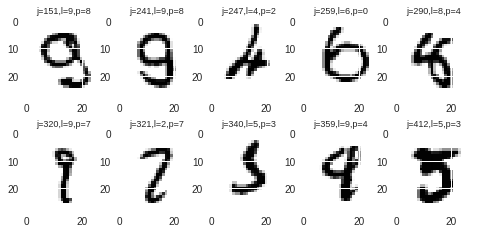

In [185]:
show_images_labels_predict_error(mnist.test.images,mnist.test.labels,prediction_result)

In [0]:
saver = tf.train.Saver()

In [0]:
save_path = saver.save(sess, "saveModel/CNN_model1")

In [188]:
print("Model saved in file: %s" % save_path)

Model saved in file: saveModel/CNN_model1


In [0]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)

In [0]:
#sess.close()

In [191]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [192]:
import os
os.chdir("/content/drive//My Drive/Colab Notebooks")
cwd = os.getcwd()
print(cwd)
!ls

/content/drive/My Drive/Colab Notebooks
 bin2result.png
 Keras_Cifar_CNN_Continue_Train.ipynb
 Keras_Cifar_CNN_Deeper_Conv3.ipynb
 Keras_Mnist_MLP_h256.ipynb
'Lecture_save&store_model_predict.ipynb'
 log
 MNIST_data
 p2.png
 plot_image.ipynb
 saveModel
 TensorFlow_Basic.ipynb
'Tensorflow_Mnist_CNN(1).ipynb'
'“Tensorflow_Mnist_CNN(1).ipynb”的副本'
 Tensorflow_Mnist_CNN.ipynb
 Tensorflow_Mnist_CNN.ipynb_test
 Tensorflow_Mnist_MLP_h256.ipynb
 TensorFlow_Tensor_neural.ipynb
 test0.ipynb
 trainandpredict.ipynb
 Untitled0.ipynb
 Untitled1.ipynb


(28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

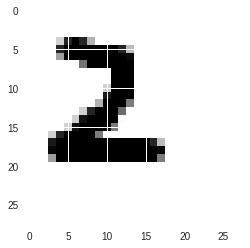

In [193]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('p2.png') # 画像の読み込み
img=1.0-img[:,:,0]
plt.imshow(img)
print(img.shape)
print(img)
plt.show()

In [194]:
img=img.reshape(784)
print(img.shape)
mnist.test.images[0]=img 

y_predict0=sess.run(y_predict, feed_dict={x: mnist.test.images[:5]})

(784,)


In [195]:
y_predict0[0]

array([1.1053229e-06, 1.1642238e-06, 9.9992466e-01, 4.0141025e-05,
       1.7012038e-05, 1.3811906e-07, 7.6026723e-09, 1.5726364e-05,
       1.9353250e-08, 6.7145423e-10], dtype=float32)

謝宜庭